# ResNet - 50 Flower Training

### 1. Necessary liabraries
This block imports the foundational libraries and modules needed for the deep learning pipeline. It includes torch and torchvision for model definition and dataset handling, along with matplotlib for plotting, and a custom dictionary flower_classes for mapping numerical class indices to the corresponding flower names. This mapping is essential for interpretability in both model evaluation and visualization.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import Flowers102
from torch.utils.data import DataLoader
#  Dictionary to map class indices to flower names
flower_classes = {
    0: "Pink primrose",
    1: "Hard-leaved pocket orchid",
    2: "Canary creeper",
    3: "Sweet pea",
    4: "English marigold",
    5: "Tiger lily",
    6: "Moon orchid",
    7: "Bird of paradise",
    8: "Monkshood",
    9: "Globe thistle",
    10: "Snapdragon",
    11: "Colt's foot",
    12: "King protea",
    13: "Spear thistle",
    14: "Yellow iris",
    15: "Globe-flower",
    16: "Purple coneflower",
    17: "Peruvian lily",
    18: "Balloon flower",
    19: "Giant white arum lily",
    20: "Fire lily",
    21: "Pincushion flower",
    22: "Fritillary",
    23: "Red ginger",
    24: "Grape hyacinth",
    25: "Corn poppy",
    26: "Prince of Wales feathers",
    27: "Stemless gentian",
    28: "Artichoke",
    29: "Sweet william",
    30: "Carnation",
    31: "Garden phlox",
    32: "Love in the mist",
    33: "Mexican aster",
    34: "Alpine sea holly",
    35: "Ruby-lipped cattleya",
    36: "Cape flower",
    37: "Great masterwort",
    38: "Siam tulip",
    39: "Lenten rose",
    40: "Barberton daisy",
    41: "Anthurium",
    42: "Frangipani",
    43: "Clematis",
    44: "Hibiscus",
    45: "Mexican petunia",
    46: "Bromelia",
    47: "Blanket flower",
    48: "Trumpet creeper",
    49: "Black-eyed Susan",
    50: "Silverbush",
    51: "Californian poppy",
    52: "Osteospermum",
    53: "Spring crocus",
    54: "Bearded iris",
    55: "Windflower",
    56: "Tree mallow",
    57: "Magnolia",
    58: "Cyclamen",
    59: "Watercress",
    60: "Canna lily",
    61: "Hippeastrum",
    62: "Bee balm",
    63: "Ball moss",
    64: "Foxglove",
    65: "Bougainvillea",
    66: "Camellia",
    67: "Mallow",
    68: "Mexican petunia",
    69: "Primula",
    70: "Sunflower",
    71: "Pelargonium",
    72: "Buttercup",
    73: "Oxeye daisy",
    74: "Common dandelion",
    75: "Petunia",
    76: "Wild pansy",
    77: "Primula vulgaris",
    78: "Poinsettia",
    79: "Bolero deep blue",
    80: "Wallflower",
    81: "Marigold",
    82: "Pincushion flower",
    83: "Buttercup",
    84: "Daisy",
    85: "Common daisy",
    86: "Blackberry lily",
    87: "Cape daisy",
    88: "Cornflower",
    89: "Passion flower",
    90: "Lotus",
    91: "Toad lily",
    92: "Anthurium",
    93: "Lady's slipper orchid",
    94: "Common tulip",
    95: "Wild rose",
    96: "Gazania",
    97: "Azalea",
    98: "Water lily",
    99: "Rose",
    100: "Thistle",
    101: "Tree poppy"
}



### 2. Combining All Data
This section handles dataset preparation using the Flowers102 dataset from torchvision.datasets. The dataset is split into training and validation subsets. A transformation pipeline is applied to resize images to the standard input size for ResNet-50 (224×224) and normalize them based on ImageNet statistics. The DataLoader is used to facilitate efficient mini-batch loading and shuffling of data during training.

In [2]:
from torchvision.datasets import Flowers102
from torch.utils.data import DataLoader

# Defining transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Setting data path
data_dir = r'E:\Flowers\flowers-102'

# Loading datasets
train_data = Flowers102(root=data_dir, split='train', download=False, transform=transform)
val_data = Flowers102(root=data_dir, split='val', download=False, transform=transform)

# Defining data loaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)



### 3. Freezing All ResNet-50 Layers Except Classifier
Here, a pretrained ResNet-50 model is initialized for transfer learning. All layers are frozen to retain pre-learned weights from ImageNet, except for the final fully connected layer (fc). This final layer is modified to output predictions across 102 flower classes, aligning the model with the Flowers102 classification task. This technique allows the model to adapt to the new task while leveraging learned feature representations.

In [3]:
import torchvision.models as models
import torch.nn as nn
import torch


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(model.fc.in_features, 102)
model = model.to(device)




C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### 4. Determining Loss, Optimizer
This block defines the loss function and optimizer. Cross-Entropy Loss is selected, which is suitable for multi-class classification tasks. The Adam optimizer( Adaptive Moment Estimation) is configured to update only the parameters of the final classifier layer, ensuring the rest of the pretrained network remains unchanged during backpropagation. This aligns with the principle of fine-tuning the model's head for a new domain-specific task.



In [4]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)  # Only training final layer



### 5. Training Loop with Progress
This block implements the model training loop with a progress bar for visualization. For each epoch, the model is set to training mode, and a forward pass is followed by loss computation and backpropagation. The loop accumulates loss and accuracy statistics and records training duration. After each epoch, the model state is optionally saved, providing checkpoints that can be restored or evaluated later.



In [5]:
from tqdm import tqdm
import time

def train_full(model, loader, optimizer, criterion, epochs=5):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct, total = 0, 0
        start = time.time()

        for images, labels in tqdm(loader, desc=f"Epoch {epoch+1}/{epochs}"):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        end = time.time()
        print(f"\n✅ Epoch {epoch+1} Completed | "
              f"Loss: {running_loss/len(loader):.4f} | "
              f"Accuracy: {100*correct/total:.2f}% | "
              f"Time: {(end-start)/60:.2f} mins")

        # Save model if needed
        torch.save(model.state_dict(), f"resnet50_all_{epoch+1}.pt")


### 6. Running the Training
This section executes the main training loop of the model. It includes forward and backward passes, loss calculation, and weight updates for each batch. This is where the network iteratively learns from the data, refining its internal weights based on loss gradients.



In [6]:
train_full(model, full_loader, optimizer, criterion, epochs=5)


Epoch 1/5: 100%|███████████████████████████████████████████████████████████████████| 256/256 [1:09:15<00:00, 16.23s/it]



✅ Epoch 1 Completed | Loss: 1.9351 | Accuracy: 62.82% | Time: 69.26 mins


Epoch 2/5: 100%|█████████████████████████████████████████████████████████████████████| 256/256 [55:05<00:00, 12.91s/it]



✅ Epoch 2 Completed | Loss: 0.5082 | Accuracy: 90.30% | Time: 55.09 mins


Epoch 3/5: 100%|███████████████████████████████████████████████████████████████████| 256/256 [1:05:45<00:00, 15.41s/it]



✅ Epoch 3 Completed | Loss: 0.3144 | Accuracy: 94.02% | Time: 65.76 mins


Epoch 4/5: 100%|███████████████████████████████████████████████████████████████████| 256/256 [1:11:56<00:00, 16.86s/it]



✅ Epoch 4 Completed | Loss: 0.2281 | Accuracy: 95.48% | Time: 71.93 mins


Epoch 5/5: 100%|███████████████████████████████████████████████████████████████████| 256/256 [1:16:50<00:00, 18.01s/it]



✅ Epoch 5 Completed | Loss: 0.1818 | Accuracy: 96.26% | Time: 76.84 mins


### 7. Evaluation on the Test Set
This block defines and runs a function to assess model performance on the held-out test set. It uses the trained network to predict labels without updating model weights. Evaluation metrics like test loss and accuracy offer insight into the model’s generalization ability.

In [6]:
torch.save(model.state_dict(), "resnet50_flowers102.pth")
print("Model saved as resnet50_flowers102.pth")


Model saved as resnet50_flowers102.pth


In [7]:
from tqdm import tqdm

def evaluate(model, data_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in tqdm(data_loader, desc="🔍 Evaluating", leave=False):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = running_loss / total
    accuracy = 100 * correct / total

    return avg_loss, accuracy



In [14]:
test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"📊 Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.2f}%")


📊 Test Loss: 4.6891 | Test Accuracy: 0.20%


### 8. Making Predictions on Sample Images
This part uses the trained model to predict the labels of a few randomly selected test images. It enables visual inspection of the model’s output and helps verify if the predictions make intuitive sense, which is crucial for qualitative model assessment.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.007843130588531533..1.0000000236034394].


🔍 Actual Label: 35
🎯 Predicted Label: 20


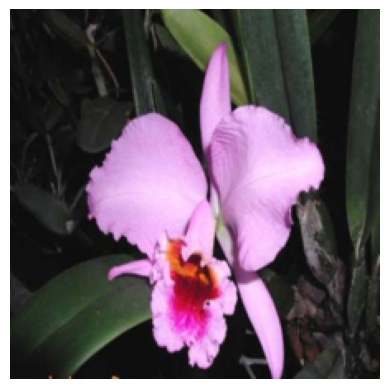

In [15]:
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import random

# Loading the class names
classes = train_set.classes if hasattr(train_set, 'classes') else list(range(102))

def imshow(img):
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Showing the random prediction
model.eval()
with torch.no_grad():
    idx = random.randint(0, len(test_set) - 1)
    image, label = test_set[idx]
    output = model(image.unsqueeze(0).to(device))
    _, predicted = torch.max(output, 1)

    print(f"🔍 Actual Label: {label}")
    print(f"🎯 Predicted Label: {predicted.item()}")
    imshow(image)


### 9. Training and Validation of ResNet-50 on Oxford Flowers 102 Dataset
This is the complete integration of the training pipeline over multiple epochs. It tracks and stores training and validation losses and accuracy metrics over time, enabling performance analysis and model diagnostics.



In [12]:
train_losses = []
val_losses = []
val_accuracies = []
num_epochs = 5 

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader.dataset)
    accuracy = 100 * correct / total

    val_losses.append(val_loss)
    val_accuracies.append(accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}] Completed")
    print(f"Train Loss: {epoch_loss:.4f} | Val Loss: {val_loss:.4f} | Val Accuracy: {accuracy:.2f}%")


Epoch 1/5: 100%|███████████████████████████████████████████████████████████████████████| 32/32 [05:28<00:00, 10.28s/it]


Epoch [1/5] Completed
Train Loss: 4.5314 | Val Loss: 3.4408 | Val Accuracy: 34.12%


Epoch 2/5: 100%|███████████████████████████████████████████████████████████████████████| 32/32 [05:00<00:00,  9.38s/it]


Epoch [2/5] Completed
Train Loss: 2.5900 | Val Loss: 2.2913 | Val Accuracy: 61.57%


Epoch 3/5: 100%|███████████████████████████████████████████████████████████████████████| 32/32 [04:55<00:00,  9.24s/it]


Epoch [3/5] Completed
Train Loss: 1.5345 | Val Loss: 1.6595 | Val Accuracy: 74.80%


Epoch 4/5: 100%|███████████████████████████████████████████████████████████████████████| 32/32 [07:22<00:00, 13.84s/it]


Epoch [4/5] Completed
Train Loss: 0.9360 | Val Loss: 1.3963 | Val Accuracy: 75.69%


Epoch 5/5: 100%|███████████████████████████████████████████████████████████████████████| 32/32 [04:31<00:00,  8.48s/it]


Epoch [5/5] Completed
Train Loss: 0.6595 | Val Loss: 1.1606 | Val Accuracy: 80.39%


### 10. Training Progress Visualization
This section provides a graphical analysis of model performance throughout training. The loss curve compares training and validation loss per epoch, enabling assessment of model convergence and potential overfitting. The validation accuracy curve illustrates the progression of model accuracy on unseen data, offering insight into generalization capability. Such visual diagnostics are essential for interpreting and validating training dynamics.

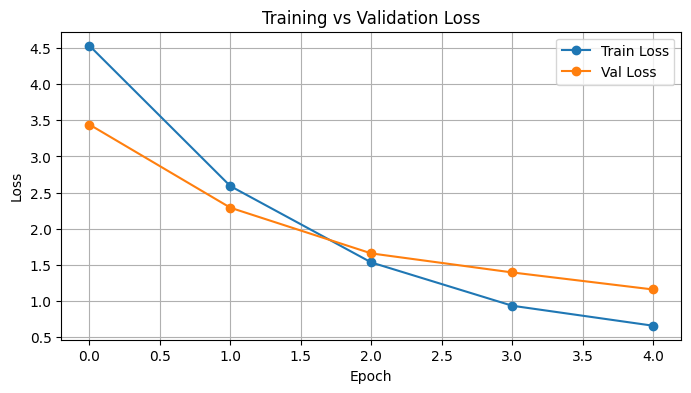

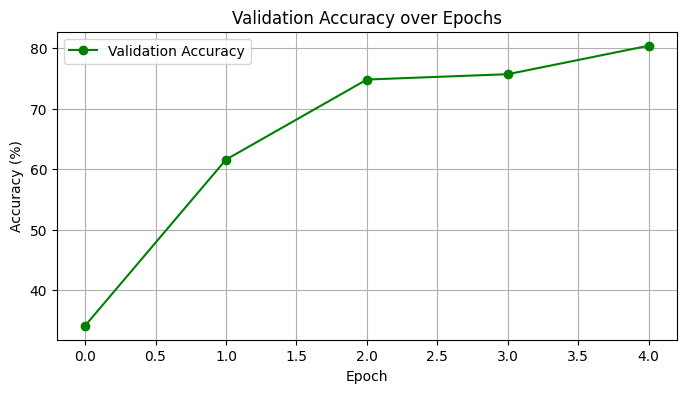

In [13]:
# Loss Plot
plt.figure(figsize=(8, 4))
plt.plot(train_losses, label='Train Loss', marker='o')
plt.plot(val_losses, label='Val Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Accuracy Plot
plt.figure(figsize=(8, 4))
plt.plot(val_accuracies, label='Validation Accuracy', marker='o', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Validation Accuracy over Epochs")
plt.legend()
plt.grid(True)
plt.show()


### 11. Visualizing Sample Predictions on Test Images
This section presents qualitative evaluation results by displaying a random subset of test images with their corresponding predicted and ground truth labels. The purpose is to visually inspect the model’s classification performance and potential errors. The images are unnormalized to restore their original pixel values for proper visualization. Such visual comparisons complement numerical metrics and help identify classes where the model may struggle.
In the images:
1. True: refers to the actual label of the flower — the ground truth class it belongs to.
2. Pred: refers to the predicted label — the class my ResNet-50 model guessed for that image.

Here, class refers to a category or type of flower.

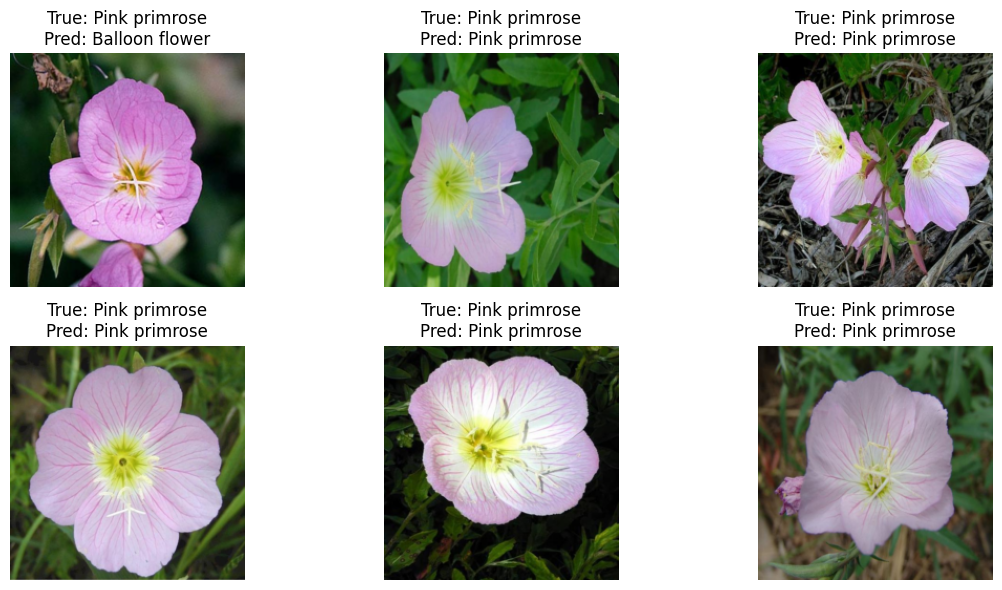

In [23]:
import matplotlib.pyplot as plt
import torchvision

#  Get one batch of images and labels from test_loader
images, labels = next(iter(test_loader))  # make sure test_loader is defined
images = images.to(device)

#  Run model to get predictions
model.eval()
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

#  Convert predictions and true labels to NumPy arrays
true = labels.cpu().numpy()
pred = preds.cpu().numpy()


# Unnormalize images and plot
inv_transform = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)

plt.figure(figsize=(12, 6))
for i in range(6):
    img = inv_transform(images[i]).permute(1, 2, 0).numpy().clip(0, 1)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(f"True: {flower_classes[true[i]]}\nPred: {flower_classes[pred[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
